In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
pink = pd.read_csv('pinkhamDates.csv', index_col=0)
pink.head()

,Year,advertising,sales
0,1907,608,1016
1,1908,451,921
2,1909,529,934
3,1910,543,976
4,1911,525,930


In [63]:
pink2.set_index('Year')

,Unnamed: 0,advertising,sales
Year,,,
1907,1,608,1016
1908,2,451,921
1909,3,529,934
1910,4,543,976
1911,5,525,930
1912,6,549,1052
1913,7,525,1184
1914,8,578,1089
1915,9,609,1087


<function matplotlib.pyplot.show(close=None, block=None)>

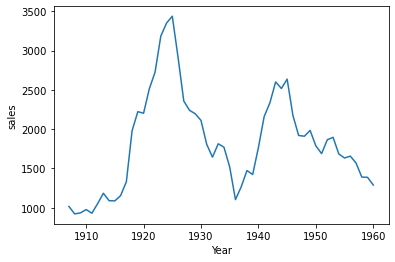

In [65]:
sns.lineplot(x=pink.Year, y=pink.sales)
plt.show

In [66]:
pink.dtypes

Year           int64
advertising    int64
sales          int64
dtype: object

In [67]:
pink['YearTest'] = pd.to_datetime(pink.Year, format='%Y')
pink.head()

,Year,advertising,sales,YearTest
0,1907,608,1016,1907-01-01
1,1908,451,921,1908-01-01
2,1909,529,934,1909-01-01
3,1910,543,976,1910-01-01
4,1911,525,930,1911-01-01


# Exploratory Analysis

### Plotting Sales over time

<function matplotlib.pyplot.show(close=None, block=None)>

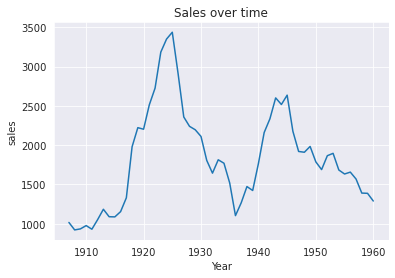

In [69]:
sns.set_style('darkgrid')
sns.lineplot(x=pink.Year, y=pink.sales).set_title('Sales over time')
plt.show

### Looking at Autocorrelation

<function matplotlib.pyplot.show(close=None, block=None)>

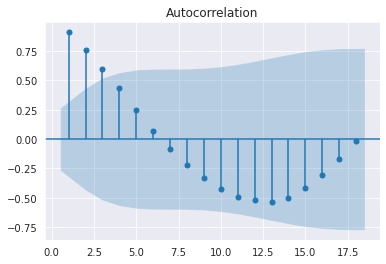

In [163]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pink.sales, zero=False)
plt.show

### Including Trend and Seasonality variables manually

#### A seasonality factor does not seem to be apparent so let's just add a trend variable

#### If there was visual or explicit evidence of seasonality we could create a seasonality variable by creating dummy variables of the seasonal markers (such as quarters)

In [74]:
trend = 1
tList = [1]
for i in range(len(pink)-1):
    trend += 1
    tList.append(trend)
print(tList)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]


In [79]:
pink['trendVar'] = np.array(tList)


,Year,advertising,sales,YearTest,trendVar
0,1907,608,1016,1907-01-01,1
1,1908,451,921,1908-01-01,2
2,1909,529,934,1909-01-01,3
3,1910,543,976,1910-01-01,4
4,1911,525,930,1911-01-01,5
5,1912,549,1052,1912-01-01,6
6,1913,525,1184,1913-01-01,7
7,1914,578,1089,1914-01-01,8
8,1915,609,1087,1915-01-01,9
9,1916,504,1154,1916-01-01,10


In [81]:
#performing a linear regression model with Sales regressed on trend
import statsmodels.api as sm
model = sm.OLS.from_formula('sales ~ trendVar', data = pink)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9637
Date:                Sat, 07 Nov 2020   Prob (F-statistic):              0.331
Time:                        18:46:07   Log-Likelihood:                -423.93
No. Observations:                  54   AIC:                             851.9
Df Residuals:                      52   BIC:                             855.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1680.2886    174.689      9.619      0.000    1329.749    2030.828
trendVar       5.4252      5.526      0.982      0.331      -5.664      16.515
==============================================================================
Omnibus:                        6.638   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.302
Skew:                           0.836   Prob(JB):                       0.0428
Kurtosis:                       3.073   Cond. No.                         64.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

above we've fit a model with the formula
$\hat{Y} = 1680.29 + 5.42\beta_1$

the fit is pretty terrible for prediction though as we can see the p-value is much greater than 0.05 and the R-squared is low.  So the model does not do a great job of explaining a lot of variance in the model (R-squared) and we don't have a lot of confidence in our predictions anyway

In [83]:
tv = 55
tvList = [55]
for i in range(9):
    tv += 1
    tvList.append(tv)
pred_DF = pd.DataFrame({'trendVar':tvList})
pred_DF

,trendVar
0,55
1,56
2,57
3,58
4,59
5,60
6,61
7,62
8,63
9,64


In [87]:
#creating a 10 year prediction using the model above
predictions = res.get_prediction(pred_DF)
pred_val = predictions.summary_frame().iloc[:,0]
pred_val

0    1978.674354
1    1984.099549
2    1989.524744
3    1994.949940
4    2000.375135
5    2005.800330
6    2011.225526
7    2016.650721
8    2022.075916
9    2027.501112
Name: mean, dtype: float64

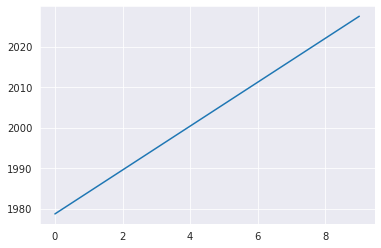

In [91]:
plt.plot(pred_val)

The model above predicts that sales should rise over the next 10 years, though again, we shouldn't put much stock in this model.

lets see if adding advertising adds anything to the model

In [92]:
model2 = sm.OLS.from_formula('sales~trendVar+advertising', data = pink)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     65.03
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           9.30e-15
Time:                        19:45:56   Log-Likelihood:                -390.21
No. Observations:                  54   AIC:                             786.4
Df Residuals:                      51   BIC:                             792.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     401.2898    147.752      2.716      0.009     104.666     697.914
trendVar        3.4726      2.994      1.160      0.252      -2.538       9.483
advertising     1.4261      0.127     11.259      0.000       1.172       1.680
==============================================================================
Omnibus:                        0.534   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.094
Skew:                          -0.019   Prob(JB):                        0.954
Kurtosis:                       3.201   Cond. No.                     3.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model abov looks much better as advertising seems to have a statistically significant positive relationship with sales.

There does seem to be an issue however with Autocorrelation as per the Durbin-Watson test.  A general rule of thumb is that a Durbin Watson score of less than 1 is cause for alarm.  Let's plot the residuals to take a visual look into any autocorrelation

<AxesSubplot:xlabel='Fitted Values', ylabel='Residuals'>

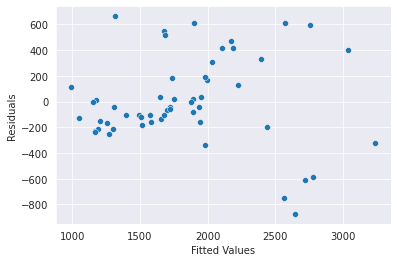

In [93]:
#plotting residuals against fitted values
fitted_values = pd.Series(res2.fittedvalues, name ='Fitted Values')
residuals = pd.Series(res2.resid, name = 'Residuals')
sns.scatterplot(x=fitted_values, y= residuals)

There seems to be some pretty severe evidence of tracking, indicating autocorrelation.  We saw evidence of the autocorrelation by plotting the Autocorrelation function above

# Incorporating Lag variables into Regression to account for previous periods

Since incoporating a trend wasn't useful (since there was no visual trend that we could see visually) let's leave it out and instead do a vanilla regression of sales regressed on advertising

In [96]:
import statsmodels.api as sm
model3 = sm.OLS.from_formula('sales~advertising', data = pink)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.26e-15
Time:                        20:08:06   Log-Likelihood:                -390.91
No. Observations:                  54   AIC:                             785.8
Df Residuals:                      52   BIC:                             789.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     488.8327    127.439      3.836      0.000     233.108     744.558
advertising     1.4346      0.127     11.308      0.000       1.180       1.689
==============================================================================
Omnibus:                        0.551   Durbin-Watson:                   0.582
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.391
Skew:                          -0.206   Prob(JB):                        0.822
Kurtosis:                       2.936   Cond. No.                     2.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

there is evidence of a positive relationship between advertising and sales here.  and the model explains 71% of the variance in the data.  **Note** we can tell that our trend variable in our last model wasn't very helpful because it only explained 0.07% additiona variance, which is miniscule

Again, we still have an autocorrelation problem here as we have a Durbin-Watson value of less than 1.

In [110]:
residuals = pd.DataFrame({'residuals':res3.resid})
residuals['row_num'] = np.array(res3.resid.index)+1

<AxesSubplot:xlabel='row_num', ylabel='residuals'>

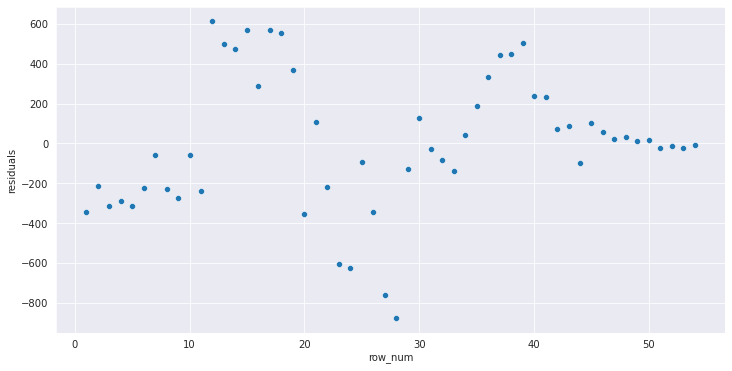

In [115]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='row_num', y='residuals', data =residuals)

The clumbing/tracking of the residuals indicates correlation

We can add a lagged Y value to try to account for some of this correlation
$\hat{Y} = \beta_0+\beta_1\text{advertise} + \beta_2\text{sales}_{t-1} + \epsilon$

In [118]:
#creating lag variable on sales
pink['sales_lag1'] = pink.sales.shift(1)
pink.head()

,Year,advertising,sales,YearTest,trendVar,sales_lag1
0,1907,608,1016,1907-01-01,1,NaN
1,1908,451,921,1908-01-01,2,1016.0
2,1909,529,934,1909-01-01,3,921.0
3,1910,543,976,1910-01-01,4,934.0
4,1911,525,930,1911-01-01,5,976.0


In [119]:
model4 = sm.OLS.from_formula('sales~advertising+sales_lag1', data=pink)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     178.2
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.77e-23
Time:                        21:21:50   Log-Likelihood:                -360.67
No. Observations:                  53   AIC:                             727.3
Df Residuals:                      50   BIC:                             733.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     138.6906     95.660      1.450      0.153     -53.449     330.830
advertising     0.3288      0.156      2.112      0.040       0.016       0.641
sales_lag1      0.7593      0.091      8.302      0.000       0.576       0.943
==============================================================================
Omnibus:                        3.133   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                2.331
Skew:                           0.499   Prob(JB):                        0.312
Kurtosis:                       3.247   Cond. No.                     6.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model is looking better, more variance explained both variables are significant, autocorrelation is going down (durbin watson is going up)

In [122]:
np.array(res4.resid.index)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

In [123]:
residuals4 = pd.DataFrame({'residuals':np.array(res4.resid),'row_num':np.array(res4.resid.index)})

<AxesSubplot:xlabel='row_num', ylabel='residuals'>

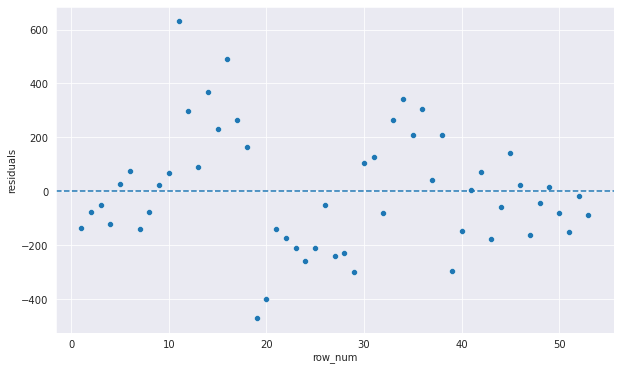

In [127]:
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='dashed')
sns.scatterplot(x='row_num', y='residuals', data=residuals4)

the residuals plot is less clumped as well indicated that some of the correlation has been accounted for but there is still some evidence tracking.  it is possible that advertising from the previous year might be useful in predicting sales

Let's create another model including a lagged term for advertising as well so the model equation is
$\hat{y} = \beta_0 \beta_1\text{advertise} + \beta_2\text{sales}_{t-1} + \beta_3\text{Advertise}_{t-1} + \epsilon$

In [128]:
#creating lag variable on advertising
pink['ad_lag1'] = pink.advertising.shift(1)
pink.head()

,Year,advertising,sales,YearTest,trendVar,sales_lag1,ad_lag1
0,1907,608,1016,1907-01-01,1,NaN,NaN
1,1908,451,921,1908-01-01,2,1016.0,608.0
2,1909,529,934,1909-01-01,3,921.0,451.0
3,1910,543,976,1910-01-01,4,934.0,529.0
4,1911,525,930,1911-01-01,5,976.0,543.0


In [129]:
model5 = sm.OLS.from_formula('sales~advertising+sales_lag1+ad_lag1', data=pink)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           3.40e-26
Time:                        00:38:18   Log-Likelihood:                -350.94
No. Observations:                  53   AIC:                             709.9
Df Residuals:                      49   BIC:                             717.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     154.0653     80.490      1.914      0.061      -7.686     315.816
advertising     0.5894      0.142      4.142      0.000       0.303       0.875
sales_lag1      0.9555      0.088     10.902      0.000       0.779       1.132
ad_lag1        -0.6601      0.142     -4.663      0.000      -0.945      -0.376
==============================================================================
Omnibus:                       17.284   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.098
Skew:                           0.962   Prob(JB):                     1.77e-07
Kurtosis:                       6.221   Cond. No.                     7.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

we've reduced even more autocorrelation, the R-squared is also up, and all variables included all have statistically significant relationships to the y-value

<AxesSubplot:xlabel='row_num', ylabel='residuals'>

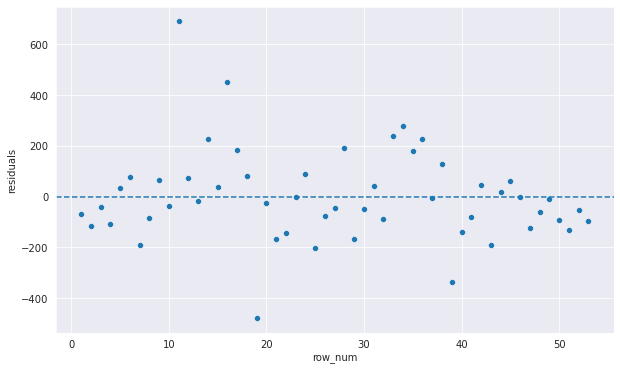

In [130]:
residuals5 = pd.DataFrame({'residuals':np.array(res5.resid),
                           'row_num':np.array(res5.resid.index)})
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='dashed')
sns.scatterplot(x='row_num', y='residuals', data=residuals5)

Determining which lags of the dependent variable can be done visually by looking at the autocorrelation and partial correlation plots.

Replotting the autocorrelation plot below:

<function matplotlib.pyplot.show(close=None, block=None)>

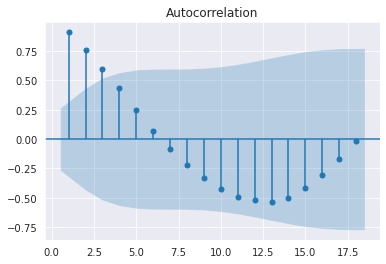

In [164]:
plot_acf(pink.sales, zero=False)
plt.show

We can see above that the first lag value has high autocorrelation.  This serves as good evidence to add it to the model (as we did in model4 above)

To spot autocorrelations for lags other than lag 1, we should turn to the partial autocorrelation plot.  This is because the partial autocorrelations are evaluated after the effects of smaller lags are accounted for.

<function matplotlib.pyplot.show(close=None, block=None)>

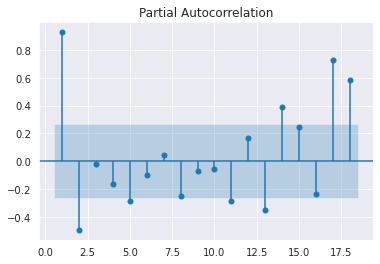

In [165]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pink.sales, zero=False)
plt.show

Autocorrelation and partial autocorrelation can also be calculated and the values can be put into a dataframe

In [133]:
from statsmodels.tsa.stattools import pacf, acf
pacf(pink.sales, nlags=20, alpha=0.05)
acf(pink.sales, nlags=20, alpha=0.05)

In [166]:
#isolating the parts of the pacf calculations output
pacfValues = pacf(pink.sales, nlags=20, alpha=0.05)[0]
bounds = pacf(pink.sales, nlags=20, alpha=0.05)[1]
lowerboundList = []
for i in range(len(bounds)):
    lowerboundList.append(bounds[i][0])
    
upperboundList = []
for i in range(len(bounds)):
    upperboundList.append(bounds[i][1])    


pacfDF = pd.DataFrame({'Partial Autocorrelation':pacfValues,
                      'Lower Bound 95%': lowerboundList,
                     'Upper Bound 95%': upperboundList})
pacfDF.iloc[1:,:]

/home/jordan/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


,Partial Autocorrelation,Lower Bound 95%,Upper Bound 95%
1,0.926805,0.660088,1.193522
2,-0.493915,-0.760632,-0.227198
3,-0.019366,-0.286083,0.247351
4,-0.165183,-0.431900,0.101534
5,-0.284319,-0.551036,-0.017602
6,-0.099499,-0.366216,0.167218
7,0.041156,-0.225561,0.307874
8,-0.249480,-0.516197,0.017237
9,-0.073171,-0.339888,0.193547
10,-0.057128,-0.323846,0.209589


In [168]:
#isolating the parts of the acf calculations output
acfValues = acf(pink.sales, nlags=20, alpha=0.05)[0]
bounds = acf(pink.sales, nlags=20, alpha=0.05)[1]
lowerboundList = []
for i in range(len(bounds)):
    lowerboundList.append(bounds[i][0])
    
upperboundList = []
for i in range(len(bounds)):
    upperboundList.append(bounds[i][1])    


acfDF = pd.DataFrame({'Autocorrelation':acfValues,
                      'Lower Bound 95%': lowerboundList,
                     'Upper Bound 95%': upperboundList})
acfDF.iloc[1:,:]

,Autocorrelation,Lower Bound 95%,Upper Bound 95%
1,0.909642,0.642925,1.176359
2,0.760076,0.325491,1.194661
3,0.597857,0.077223,1.118491
4,0.431638,-0.135737,0.999012
5,0.250789,-0.339483,0.841062
6,0.069356,-0.528449,0.667160
7,-0.083993,-0.682370,0.514383
8,-0.218355,-0.817569,0.380860
9,-0.334147,-0.938995,0.270702
10,-0.423806,-1.041647,0.194035


<function matplotlib.pyplot.show(close=None, block=None)>

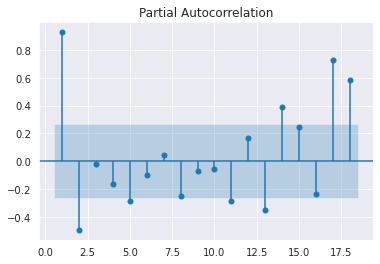

In [169]:
plot_pacf(pink.sales, zero=False)
plt.show

Looking at the chart above we can see that lag value 2 may be negatively correlated with sales.  Let's try adding that to our model

In [171]:
pink['sales_lag2'] =pink.sales.shift(2)
pink.head()

,Year,advertising,sales,YearTest,trendVar,sales_lag1,ad_lag1,sales_lag2
0,1907,608,1016,1907-01-01,1,NaN,NaN,NaN
1,1908,451,921,1908-01-01,2,1016.0,608.0,NaN
2,1909,529,934,1909-01-01,3,921.0,451.0,1016.0
3,1910,543,976,1910-01-01,4,934.0,529.0,921.0
4,1911,525,930,1911-01-01,5,976.0,543.0,934.0


In [172]:
model6 = sm.OLS.from_formula('sales~advertising+sales_lag1+sales_lag2+ad_lag1', data = pink)
res6 = model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     142.8
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.14e-25
Time:                        23:09:42   Log-Likelihood:                -340.72
No. Observations:                  52   AIC:                             691.4
Df Residuals:                      47   BIC:                             701.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     192.1027     78.596      2.444      0.018      33.988     350.217
advertising     0.5131      0.137      3.740      0.000       0.237       0.789
sales_lag1      1.2184      0.126      9.671      0.000       0.965       1.472
sales_lag2     -0.3200      0.114     -2.803      0.007      -0.550      -0.090
ad_lag1        -0.5130      0.143     -3.578      0.001      -0.801      -0.225
==============================================================================
Omnibus:                       12.362   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.975
Skew:                           0.665   Prob(JB):                     2.79e-05
Kurtosis:                       5.813   Cond. No.                     9.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All variables continue to have a statistically significant relationship with sales and our R-squared has increase again!

<AxesSubplot:xlabel='row_num', ylabel='residuals'>

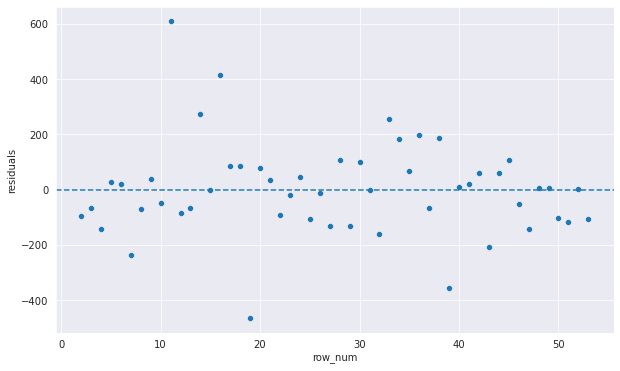

In [173]:
residuals6 = pd.DataFrame({'residuals':np.array(res6.resid),
                           'row_num':np.array(res6.resid.index)})
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='dashed')
sns.scatterplot(x='row_num', y='residuals', data=residuals6)

**NOTE** Because we are using lagged variables, which by nature are correlated to the values that the lagged variables are created from.  We have to use caution when interpretting the coefficient of the model directly.  This is due to the fact that we've created heavy multicollinearity in the model.

## Dealing with Stationarity

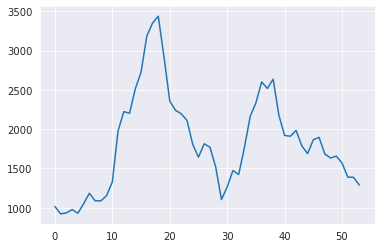

In [174]:
plt.plot(pink.sales)

**Stationarity** can be thought of as the __lack__ of presence of pattern within a time series.  While no _trend_ or _seasonality_ pattern seems to exist we can definitiy see a long term pattern of rising sales, declining sales, and rising sales.

If we want to get the most out of our autocorrelation chart to determine variables to add, we should transform out data to be stationary

### Differencing
We can create a **First Difference** value for sales which represents the increase (or decrease) in sales from year t-1 to year t and look at the autocorrelation plot of this value.

the equation for the first difference would be
$\text{Diff}(Sales_t) = Sales_t-Sales_{t-1}$

In [184]:
#creating the first difference
pink['diffSales'] = pink.sales-pink.sales_lag1
pink = pink.loc[:,['Year', 'advertising', 'sales','YearTest', 'trendVar', 'sales_lag1', 'ad_lag1', 'sales_lag2','diffSales']]
pink.head()

,Year,advertising,sales,YearTest,trendVar,sales_lag1,ad_lag1,sales_lag2,diffSales
0,1907,608,1016,1907-01-01,1,NaN,NaN,NaN,NaN
1,1908,451,921,1908-01-01,2,1016.0,608.0,NaN,-95.0
2,1909,529,934,1909-01-01,3,921.0,451.0,1016.0,13.0
3,1910,543,976,1910-01-01,4,934.0,529.0,921.0,42.0
4,1911,525,930,1911-01-01,5,976.0,543.0,934.0,-46.0


<AxesSubplot:xlabel='Year', ylabel='diffSales'>

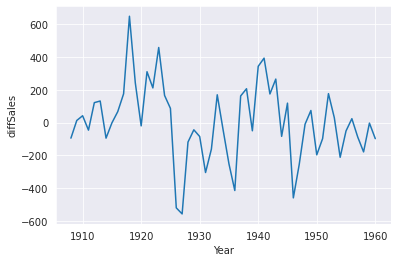

In [185]:
#time series plot for diff(sales)
sns.lineplot(x='Year', y='diffSales', data=pink)

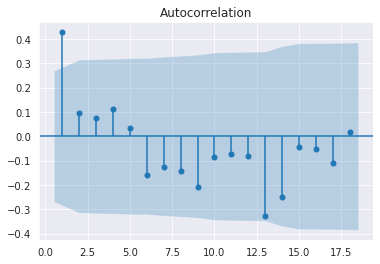

In [190]:
#autocorrelation for diff sales
pt=plot_acf(pink.loc[1:,'diffSales'], zero=False)

We can still see that lag 1 looks to be significant